In [1]:
# Import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error

from math import sqrt

import pylab
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult      # for ETS Plots

from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Membaca data dari file CSV
df = pd.read_csv('air traffic.csv')


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB
None


In [6]:
df.head()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07


In [7]:

# List of columns that should be numeric but are currently objects
columns_to_convert = ['Dom_Pax', 'Int_Pax', 'Pax', 'Dom_Flt', 'Int_Flt', 'Flt',
                      'Dom_RPM', 'Int_RPM', 'RPM', 'Dom_ASM', 'Int_ASM', 'ASM']

# Remove commas and convert to numeric
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Check the data types again
print(df.dtypes)


Year         int64
Month        int64
Dom_Pax      int64
Int_Pax      int64
Pax          int64
Dom_Flt      int64
Int_Flt      int64
Flt          int64
Dom_RPM      int64
Int_RPM      int64
RPM          int64
Dom_ASM      int64
Int_ASM      int64
ASM          int64
Dom_LF     float64
Int_LF     float64
LF         float64
dtype: object


In [8]:
df.head(10)

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,43032450,4905830,47938280,785160,57667,842827,36211422,12885980,49097402,56191300,17968572,74159872,64.44,71.71,66.20
1,2003,2,41166780,4245366,45412146,690351,51259,741610,34148439,10715468,44863907,50088434,15587880,65676314,68.18,68.74,68.31
2,2003,3,49992700,5008613,55001313,797194,58926,856120,41774564,12567068,54341633,57592901,17753174,75346075,72.53,70.79,72.12
3,2003,4,47033260,4345444,51378704,766260,55005,821265,39465980,10370592,49836572,54639679,15528761,70168440,72.23,66.78,71.02
4,2003,5,49152352,4610834,53763186,789397,55265,844662,41001934,11575026,52576960,55349897,15629821,70979718,74.08,74.06,74.07
5,2003,6,52209516,5411504,57621020,798351,58225,856576,44492972,13918185,58411157,56555517,17191579,73747096,78.67,80.96,79.20
6,2003,7,55810773,6191120,62001893,831619,62957,894576,48321924,15516794,63838718,59617048,18701759,78318807,81.05,82.97,81.51
7,2003,8,53920973,6272332,60193305,830737,63760,894497,46982527,15906430,62888957,59634190,19144885,78779075,78.78,83.08,79.83
8,2003,9,44213408,4824596,49038004,781804,54017,835821,36819820,13570889,50390709,54973852,17820478,72794329,66.98,76.15,69.22
9,2003,10,49944931,4920822,54865753,818308,54272,872580,41480412,13447446,54927858,58001020,17694417,75695437,71.52,76.00,72.56


In [9]:
df.isnull().sum()


Year       0
Month      0
Dom_Pax    0
Int_Pax    0
Pax        0
Dom_Flt    0
Int_Flt    0
Flt        0
Dom_RPM    0
Int_RPM    0
RPM        0
Dom_ASM    0
Int_ASM    0
ASM        0
Dom_LF     0
Int_LF     0
LF         0
dtype: int64

In [10]:
df.isnull().sum()


Year       0
Month      0
Dom_Pax    0
Int_Pax    0
Pax        0
Dom_Flt    0
Int_Flt    0
Flt        0
Dom_RPM    0
Int_RPM    0
RPM        0
Dom_ASM    0
Int_ASM    0
ASM        0
Dom_LF     0
Int_LF     0
LF         0
dtype: int64

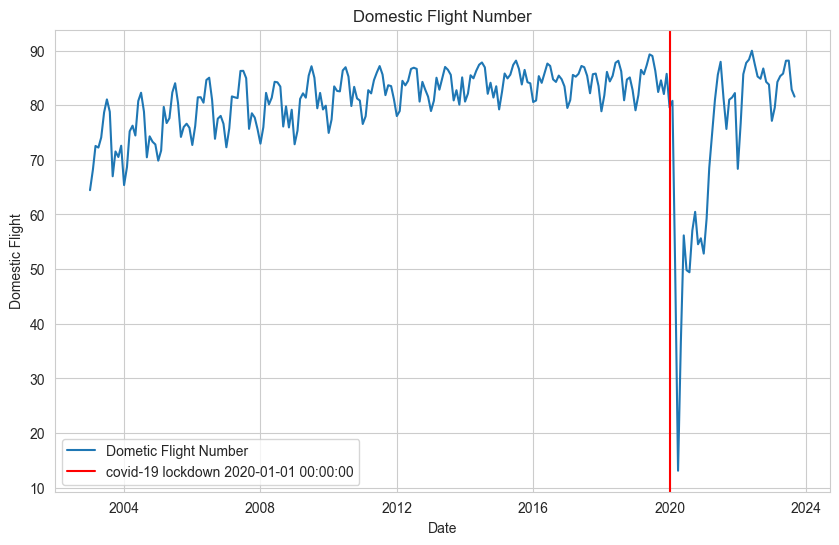

In [11]:
#create a date column
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

#lockdown start date
lockdown_date = pd.Timestamp('2020-01-01')


#plot with matplotlib
plt.figure(figsize =(10,6)) 
plt.plot(df['date'],df['Dom_LF'], label ='Dometic Flight Number' )
plt.axvline(lockdown_date, color = 'r', label = f'covid-19 lockdown {lockdown_date}')
plt.title('Domestic Flight Number')
plt.xlabel('Date')
plt.ylabel('Domestic Flight')
plt.grid(True)
plt.legend()
plt.show()

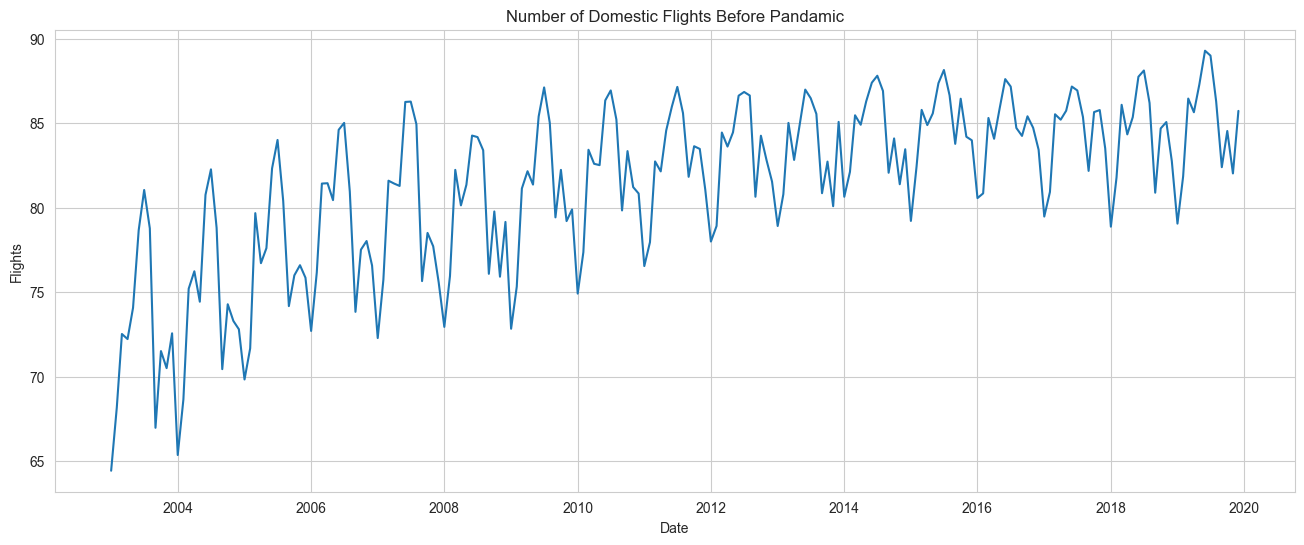

In [12]:
# create dataframe before lockdown
df_normal_times = df[df['date'] <lockdown_date]

#plot using matplotlib
plt.figure(figsize=(16, 6))
plt.plot(df_normal_times['date'], df_normal_times['Dom_LF'])
plt.grid(True)
plt.title('Number of Domestic Flights Before Pandamic')
plt.xlabel('Date')
plt.ylabel('Flights')
plt.show()

In [13]:
def plot_seasonal_decompose(result:DecomposeResult, dates:pd.Series=None, title:str="Seasonal Decomposition"):
    x_values = dates if dates is not None else np.arange(len(result.observed))
    cols = px.colors.qualitative.Pastel    
    return (
        make_subplots(
            rows=4,
            cols=1,
            subplot_titles=["Observed", "Trend", "Seasonal", "Residuals"],
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.observed, mode="lines", name='Observed', marker=dict(color=cols[0])),
            row=1,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.trend, mode="lines", name='Trend', marker=dict(color=cols[1])),
            row=2,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.seasonal, mode="lines", name='Seasonal', marker=dict(color=cols[2])),
            row=3,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.resid, mode="lines", name='Residual', marker=dict(color=cols[3])),
            row=4,
            col=1,
        )
        .update_layout(
            height=900, title=f'<b>{title}</b>', margin={'t':100}, title_x=0.5, showlegend=False
        )
    )
seasonal_df = pd.DataFrame(df.groupby(['date'])['Dom_Pax'].apply("mean"))

decomposition = seasonal_decompose(seasonal_df['Dom_Pax'], model='additive', period=12)
fig = plot_seasonal_decompose(decomposition, dates=seasonal_df.index)

fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    title=''
)

fig.show()

In [47]:

# Create a combined figure for both domestic and international passengers
fig = px.line(df, x='date', y=['Dom_RPM', 'Int_RPM'], 
              labels={'value': 'Number of Passengers', 'variable': 'Type'},
              title='Trend in Domestic and International Passengers Over Time')

# Customize the layout
fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

# Update the legend to show appropriate labels
fig.for_each_trace(lambda t: t.update(name=t.name.split('_')[0], legendgroup=t.name.split('_')[0]))

fig.show()

In [17]:
# so lets make a new & simpler df to work with 
new_df = df[['date', 'Dom_RPM']].copy()
new_df['Date'] = pd.to_datetime(new_df['date'])
new_df.set_index('Date', inplace=True)

In [18]:
# Split the data into training and testing sets
split_date = pd.to_datetime('2023-01-01')  
train = new_df.loc[:split_date]  
test = new_df.loc[split_date:]   

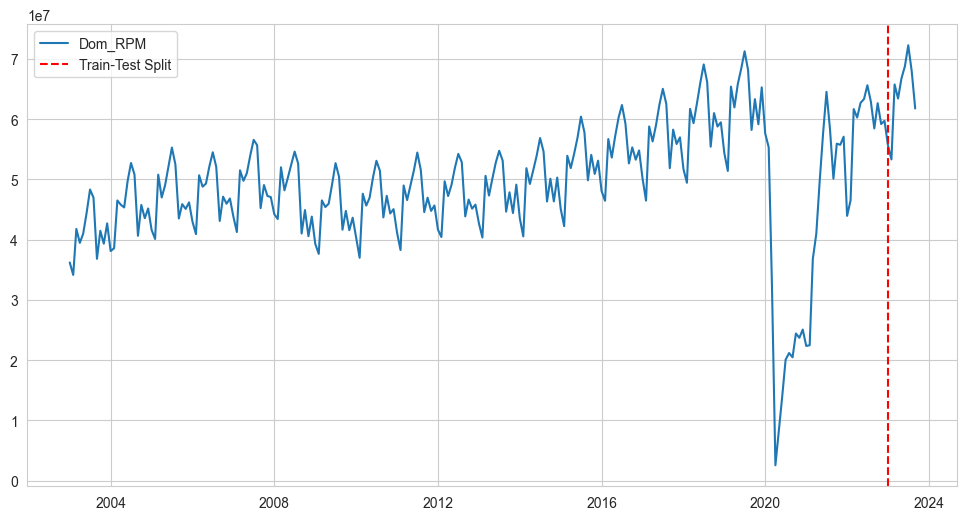

In [19]:
plt.figure(figsize=(12,6))
plt.plot(new_df.index, new_df['Dom_RPM'], label='Dom_RPM')
plt.axvline(x=split_date, color='red', linestyle='--', label='Train-Test Split')
plt.legend()
plt.show()

In [20]:
# stationarity check
from statsmodels.tsa.stattools import adfuller
st_train= adfuller(train['Dom_RPM'], autolag='AIC')
print(st_train)

(-3.4226696016299547, 0.010209919011204154, 13, 227, {'1%': -3.4594900381360034, '5%': -2.8743581895178485, '10%': -2.573601605503697}, 7463.150034343683)


Text(0.5, 1.0, "Autocorrelation Plot for 'Training Set'")

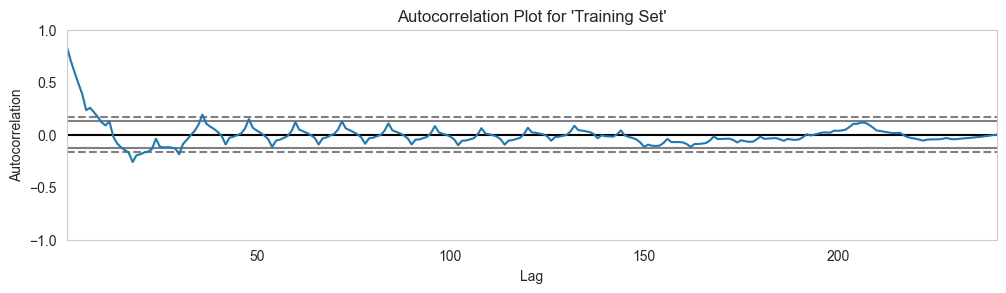

In [21]:

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
pd.plotting.autocorrelation_plot(train['Dom_RPM'])
plt.title(f"Autocorrelation Plot for 'Training Set'")

In [22]:

# differencing the training data 
train['Dom_RPM_diff'] = train['Dom_RPM'].diff().shift(-1)

In [23]:
train['Dom_RPM_diff'].isnull().sum()

1

In [24]:
train.tail()

,date,Dom_RPM,Dom_RPM_diff
Date,,,
2022-09-01,2022-09-01,58463970,4192893.0
2022-10-01,2022-10-01,62656863,-3462566.0
2022-11-01,2022-11-01,59194297,530209.0
2022-12-01,2022-12-01,59724506,-4096763.0
2023-01-01,2023-01-01,55627743,NaN


In [25]:
train = train.dropna()

In [26]:
train = train.dropna()
# checking ADF reults after differencing
diff_st_train= adfuller(train['Dom_RPM'], autolag='AIC')
print(diff_st_train)

(-3.5346244529761255, 0.00714113801610922, 13, 226, {'1%': -3.4596204846395824, '5%': -2.8744153028455948, '10%': -2.5736320761218576}, 7429.093256516401)


In [27]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

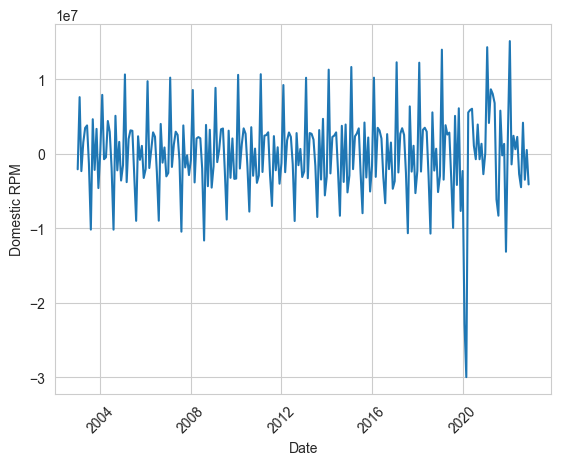

In [28]:
plt.plot(train.index, train['Dom_RPM_diff'])
plt.xlabel('Date')
plt.ylabel('Domestic RPM')
plt.xticks(rotation=45)
plt.show()

In [29]:
order = (1, 1, 1)
arima_model = sm.tsa.arima.ARIMA(train['Dom_RPM_diff'].dropna(), order=order)  
fitted = arima_model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:           Dom_RPM_diff   No. Observations:                  240
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4058.061
Date:                Tue, 15 Oct 2024   AIC                           8122.122
Time:                        01:24:34   BIC                           8132.552
Sample:                    01-01-2003   HQIC                          8126.325
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0813      0.052     -1.571      0.116      -0.183       0.020
ma.L1         -0.9967      0.076    -13.055      0.000      -1.146      -0.847
sigma2      4.056e+13    1.3e-15   3.11e+28      0.0

In [ ]:
cols = px.colors.qualitative.Pastel
fig = go.Figure()
fig.add_trace(go.Scatter(y=test['Baggage'],
                    mode='lines',
                    name='Real Values',
                    marker=dict(color=cols[0])
                        ))
fig.add_trace(go.Scatter(y=predictions,
                    mode='lines',
                    name='SARIMA Test Predictions',
                    marker=dict(color=cols[1])
                        ))
fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    title=''
)
fig.update_xaxes(
    dtick = 1
)
fig.show()


.....

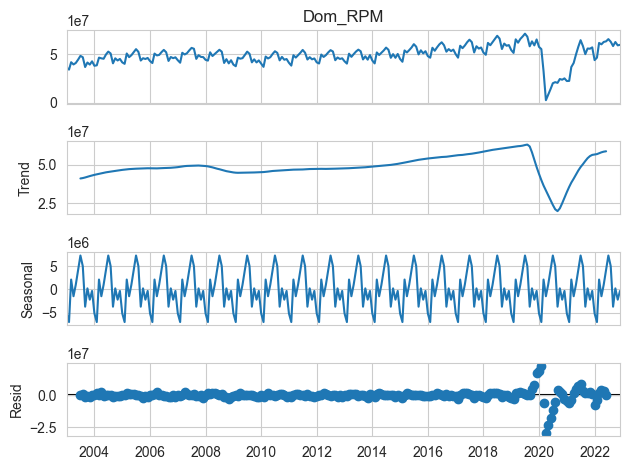

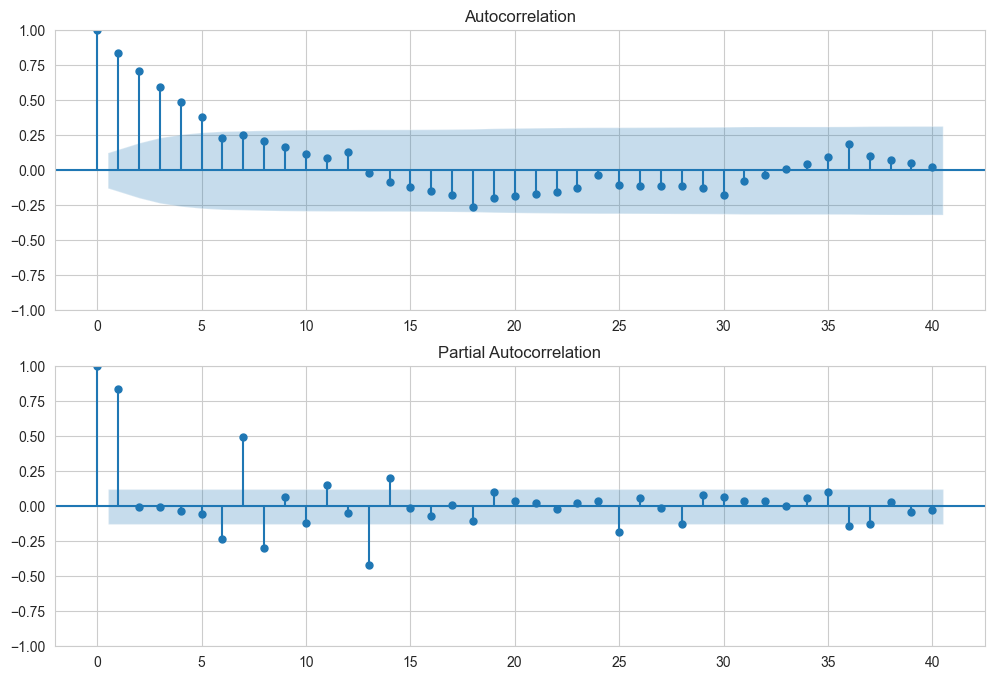

In [30]:
# decompose the time series to observe seasonal patterns
decomposition = sm.tsa.seasonal_decompose(train['Dom_RPM'], model='additive', period=12)  
decomposition.plot()
plt.show()

# ACF & PACF plots
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
sm.graphics.tsa.plot_acf(train['Dom_RPM'], lags=40, ax=ax1)  
sm.graphics.tsa.plot_pacf(train['Dom_RPM'], lags=40, ax=ax2)  
plt.show()

In [31]:
# non seasonal order 
p = 1 # number of lag observations in the model (AR term)
d = 1 # the number of times that the raw observations are differenced (I term)
q = 0  # the size of the moving average window (MA term)

# sasonal order
P = 0  # seasonal autoregressive order
D = 1  # essasonal differencing order
Q = 1  # seasonal moving average order
s = 12 # the number of periods in a season
seasonal_order = (P, D, Q, s)

In [32]:
sarima_model = sm.tsa.statespace.SARIMAX(train['Dom_RPM'],
                                          order=(p, d, q),
                                          seasonal_order=seasonal_order,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

fitted_sarima = sarima_model.fit()
print(fitted_sarima.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76948D+01    |proj g|=  6.32188D+01

At iterate    5    f=  1.47819D+01    |proj g|=  2.95769D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     12      1     0     0   7.104D-07   1.478D+01
  F =   14.781890403969346     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


                                      SARIMAX Results                                       
Dep. Variable:                              Dom_RPM   No. Observations:                  240
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -3547.654
Date:                              Tue, 15 Oct 2024   AIC                           7101.307
Time:                                      01:25:16   BIC                           7111.405
Sample:                                  01-01-2003   HQIC                          7105.388
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3927      0.032     12.149      0.000       0.329       0.456
ma.S.L12      -0.60

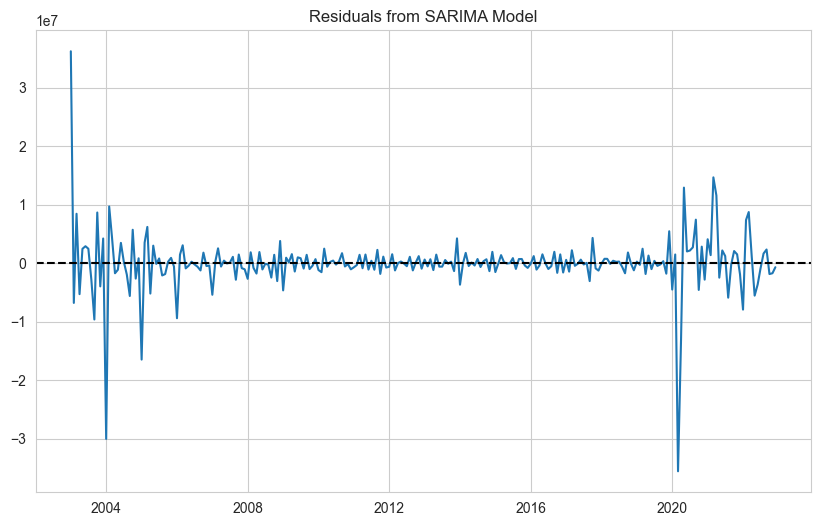

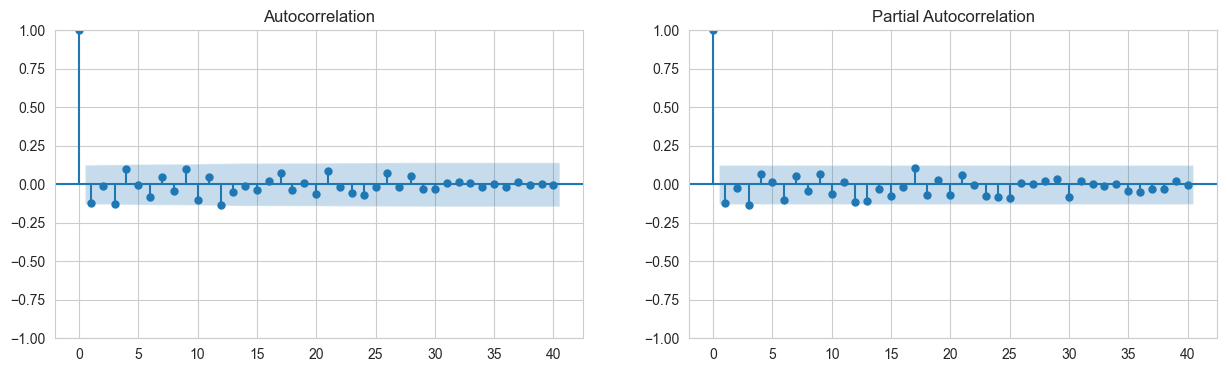

In [33]:
residuals = fitted_sarima.resid

# Plot the residuals
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals from SARIMA Model')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()# Plot ACF and PACF of the residuals
fig, ax = plt.subplots(1,2,figsize=(15,4))
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
plt.show()

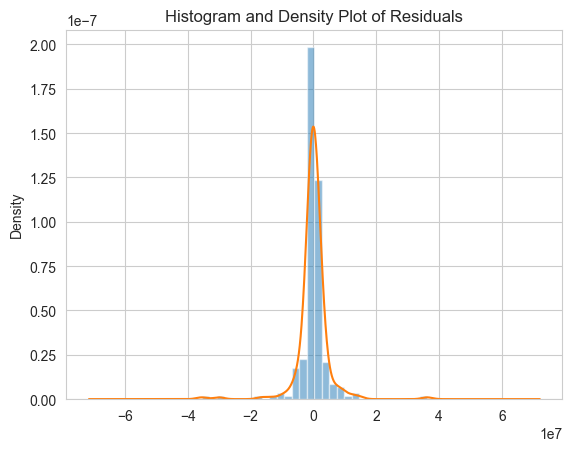

In [34]:
 # Histogram and kernel density estimate
residuals.plot(kind='hist', density=True, bins=30, alpha=0.5)
residuals.plot(kind='kde')
plt.title('Histogram and Density Plot of Residuals')
plt.show()

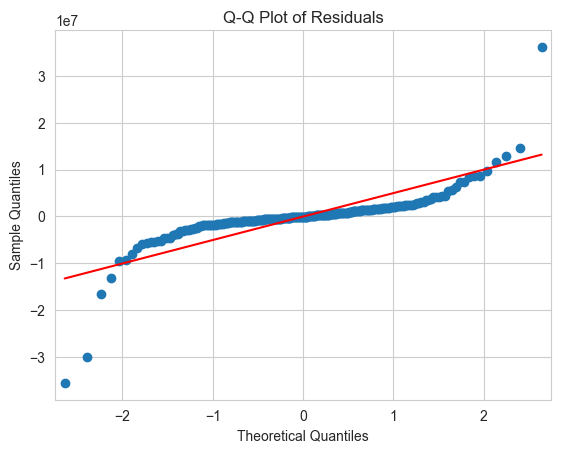

In [35]:
# Q-Q plot to check for normality
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [36]:
# statistical tests for normality
from scipy import stats
jb_test = stats.jarque_bera(residuals)
print(f'Jarque-Bera test statistics: {jb_test[0]}, p-value: {jb_test[1]}')


Jarque-Bera test statistics: 6792.539958715165, p-value: 0.0


In [37]:
# statistical test for zero mean
mean_test = stats.ttest_1samp(residuals, 0)
print(f'Test Statistic: {mean_test.statistic}, p-value: {mean_test.pvalue}')

Test Statistic: -0.10122397254825494, p-value: 0.919457533923656


In [38]:
# statistical test for autocorrelation
ljung_box_test = sm.stats.acorr_ljungbox(residuals, lags=[40], return_df=True)
print(ljung_box_test)

      lb_stat  lb_pvalue
40  35.096743   0.690385


In [39]:
covid_start = '2020-03-01'  
covid_end = '2021-09-01'    

# creating a dummy variable for the covid period
train['covid_dummy'] = np.where((train.index >= covid_start) & (train.index <= covid_end), 1, 0)
# SARIMA model with an exogenous variable (the dummy variable)
sarimax_model1 = sm.tsa.statespace.SARIMAX(train['Dom_RPM'],
                                           exog=train['covid_dummy'],
                                           order=(p, d, q),
                                           seasonal_order=(P, D, Q, s),
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)

fitted_sarimax1 = sarimax_model1.fit()
print(fitted_sarimax1.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50425D+01    |proj g|=  5.12549D+00

At iterate    5    f=  1.46920D+01    |proj g|=  8.23735D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   2.977D-06   1.469D+01
  F =   14.691945172187129     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Results                                       
Dep. Variable:                         

In [41]:
# lets try again but with decay
covid_start = pd.to_datetime('2020-03-01')
covid_end = pd.to_datetime('2021-09-01')
# calculating the number of days since the start of COVID-19 and convert to months by dividing by 30
train['months_since_covid'] = ((train.index - covid_start) / np.timedelta64(1, 'D') / 30).astype(int)
# linear decay
duration_in_months = ((covid_end - covid_start) / np.timedelta64(1, 'D') / 30)
train['covid_impact'] = train['months_since_covid'].apply(
    lambda x: max(1 - x / duration_in_months, 0) if x >= 0 else 0
)

In [42]:
sarimax_model_with_decay = sm.tsa.statespace.SARIMAX(
    train['Dom_RPM'],  
    exog=train[['covid_dummy', 'covid_impact']],
    order=(p, d, q),
    seasonal_order=(P, D, Q, s),
    enforce_stationarity=False,
    enforce_invertibility=False
)

fitted_sarimax_with_decay = sarimax_model_with_decay.fit()
print(fitted_sarimax_with_decay.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50903D+01    |proj g|=  5.89958D+00


 This problem is unconstrained.



At iterate    5    f=  1.46961D+01    |proj g|=  8.25356D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     11      1     0     0   1.209D-06   1.470D+01
  F =   14.696124002402614     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Results                                       
Dep. Variable:                              Dom_RPM   No. Observations:                  240
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -3527.070
Date:                              Tue, 15 Oct 2024   AIC                         

In [43]:
# number of periods to forecast(next 12 months)
n_periods = 12
future_dates = pd.date_range(train.index[-1] + pd.offsets.MonthBegin(), periods=n_periods, freq='M')
# assuming covid is starting go away, w impact from 0.5 to 0 
future_covid_dummy = [0] * n_periods  
future_covid_impact = np.linspace(start=0.5, stop=0, num=n_periods)  #
# combining into a df
future_exog = pd.DataFrame({'covid_dummy': future_covid_dummy, 'covid_impact': future_covid_impact}, index=future_dates)

In [44]:
n_periods = 12  
forecast = fitted_sarimax_with_decay.get_forecast(steps=n_periods, exog=future_exog)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

In [85]:
import plotly.graph_objects as go
import pandas as pd

# No filter, use full historical data
train_filtered = train  # Use the full dataset

# Create the figure
fig = go.Figure()

# Adding historical data (full range)
fig.add_trace(go.Scatter(
    x=train_filtered.index,
    y=train_filtered['Dom_RPM'],
    mode='lines',
    name='Historical',
    line=dict(color=cols[0]),  # Same color as the third code
    marker=dict(size=5)
))

# Adding forecast mean
forecast_dates = pd.date_range(train_filtered.index[-1], periods=n_periods, freq='M')
fig.add_trace(go.Scatter(
    x=forecast_dates,
    y=forecast_mean,
    mode='lines',
    name='Forecast',
    line=dict(color=cols[1]),  # Same color as the third code
    marker=dict(size=5)
))

# Updating layout
fig.update_layout(
    title='Comparison between Historical Data and Forecast',
    xaxis_title='Date',
    yaxis_title='Dom_RPM (in millions)',
    plot_bgcolor='white',
    legend=dict(
        x=1,
        y=1,
        traceorder='normal',
        orientation='v',
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor=None,
        borderwidth=0
    ),
    yaxis=dict(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
)

# Show the figure
fig.show()


In [84]:
import plotly.graph_objects as go
import plotly.express as px

# Assuming train, forecast_mean, forecast_conf_int, and test DataFrames are already defined

# Set color palette
cols = px.colors.qualitative.Pastel

# Create a figure
fig = go.Figure()

# Historical data (you can also limit this to the last 48 points if needed)
fig.add_trace(go.Scatter(x=train.index[-48:], y=train['Dom_RPM'][-48:],
                         mode='lines',
                         name='Historical',
                         line=dict(color=cols[0])))

# Forecast data
fig.add_trace(go.Scatter(x=forecast_mean.index, y=forecast_mean,
                         mode='lines',
                         name='Forecast',
                         line=dict(color=cols[1], width=2)))  # Increased line width for clarity

# Confidence intervals (dashed lines) with green color
fig.add_trace(go.Scatter(x=forecast_conf_int.index, 
                         y=forecast_conf_int.iloc[:, 0],
                         mode='lines',
                         name='Lower Confidence Interval',
                         line=dict(color='green', width=1, dash='dash'),  # Green color
                         showlegend=True))

fig.add_trace(go.Scatter(x=forecast_conf_int.index, 
                         y=forecast_conf_int.iloc[:, 1],
                         mode='lines',
                         name='Upper Confidence Interval',
                         line=dict(color='green', width=1, dash='dash'),  # Green color
                         showlegend=True))

# Test set
fig.add_trace(go.Scatter(x=test.index, y=test['Dom_RPM'],
                         mode='lines',
                         name='Actual Test Set',
                         line=dict(color=cols[2])))

# Update layout
fig.update_layout(title='Comparison between the Test and Forecast',
                  xaxis_title='Date',
                  yaxis_title='Dom_RPM (in millions)',
                  plot_bgcolor='white')

# Update y-axes styling
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    title=''
)

# Show the figure
fig.show()


In [83]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Ensure your DataFrame indices are datetime
train.index = pd.to_datetime(train.index)
forecast_mean.index = pd.to_datetime(forecast_mean.index)
test.index = pd.to_datetime(test.index)

# Set color palette
cols = px.colors.qualitative.Pastel

# Create a figure
fig = go.Figure()

# Actual test set data
fig.add_trace(go.Scatter(x=test.index, y=test['Dom_RPM'],
                         mode='lines',
                         name='Actual Test Set',
                         line=dict(color=cols[2])))  # Use Pastel color 3

# Forecast data
fig.add_trace(go.Scatter(x=forecast_mean.index, y=forecast_mean,
                         mode='lines',
                         name='Forecast',
                         line=dict(color=cols[1])))  # Use Pastel color 2

# Update layout
fig.update_layout(title='Comparison between the Test and Forecast',
                  xaxis_title='Date',
                  yaxis_title='Dom_RPM (in millions)',
                  plot_bgcolor='white')

# Update y-axes styling
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    title=''
)

# Update x-axes styling
fig.update_xaxes(
    dtick='M1',
    tickformat="%Y-%m",
    tickangle=45,
    showgrid=True,
    gridcolor='lightgrey',
    gridwidth=1
)

# Show the figure
fig.show()
